## Wk5 Assignment

## Lincoln Brown

## DSC550-T302

## Professor Werner


In [44]:
# Import libraries
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import numpy as np
import pandas as pd
import re
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import LinearSVC, SVC

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/x/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Step 1: Get the Stemmed Data
Get the stemmed data using the same process you did in Week 3 


In [10]:
# Import the data
f_name = "labeledTrainData.tsv"

df = pd.read_csv(f_name, delimiter='\t')

print(f"There are {df.shape[0]} rows and {df.shape[1]} columns")


There are 25000 rows and 3 columns


In [11]:
nltk_df = df.copy()
nltk_df

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...
...,...,...,...
24995,3453_3,0,It seems like more consideration has gone into...
24996,5064_1,0,I don't believe they made this film. Completel...
24997,10905_3,0,"Guy is a loser. Can't get girls, needs to buil..."
24998,10194_3,0,This 30 minute documentary Buñuel made in the ...


In [12]:
nltk_reviews = nltk_df['review'].values
len(nltk_reviews)

25000

## Cleaning Function Goals:
<ul>
    <li>Convert all words to lowercase</li>
    <li>Remove punctuation and special characters</li>
    <li>Remove stop words</li>
</ul>


In [13]:
# Let's make a function to clean up the text
def clean_text(text):
    stop_words = stopwords.words('english')
    # Remove punctuation and special characters
    pattern = r'([A-Za-z]*)'
    pattern = re.compile(pattern)
    cleaned = pattern.findall(text)
    # Convert to lower case
    words = [word.lower() for word in cleaned if word]     
    words = [word.lower() for word in words if word not in stop_words]
    return words

In [14]:
# Test clean_text function
x = nltk_df.loc[0,'review']
test_clean = clean_text(nltk_reviews[0])
test_clean

['stuff',
 'going',
 'moment',
 'mj',
 'started',
 'listening',
 'music',
 'watching',
 'odd',
 'documentary',
 'watched',
 'wiz',
 'watched',
 'moonwalker',
 'maybe',
 'want',
 'get',
 'certain',
 'insight',
 'guy',
 'thought',
 'really',
 'cool',
 'eighties',
 'maybe',
 'make',
 'mind',
 'whether',
 'guilty',
 'innocent',
 'moonwalker',
 'part',
 'biography',
 'part',
 'feature',
 'film',
 'remember',
 'going',
 'see',
 'cinema',
 'originally',
 'released',
 'subtle',
 'messages',
 'mj',
 'feeling',
 'towards',
 'press',
 'also',
 'obvious',
 'message',
 'drugs',
 'bad',
 'kay',
 'br',
 'br',
 'visually',
 'impressive',
 'course',
 'michael',
 'jackson',
 'unless',
 'remotely',
 'like',
 'mj',
 'anyway',
 'going',
 'hate',
 'find',
 'boring',
 'may',
 'call',
 'mj',
 'egotist',
 'consenting',
 'making',
 'movie',
 'mj',
 'fans',
 'would',
 'say',
 'made',
 'fans',
 'true',
 'really',
 'nice',
 'br',
 'br',
 'actual',
 'feature',
 'film',
 'bit',
 'finally',
 'starts',
 'minutes',
 'e

In [15]:
nltk_df['clean_review'] = nltk_df['review'].apply(clean_text)
nltk_df

,id,sentiment,review,clean_review
0,5814_8,1,With all this stuff going down at the moment w...,"[stuff, going, moment, mj, started, listening,..."
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi...","[classic, war, worlds, timothy, hines, enterta..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...,"[film, starts, manager, nicholas, bell, giving..."
3,3630_4,0,It must be assumed that those who praised this...,"[must, assumed, praised, film, greatest, filme..."
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...,"[superbly, trashy, wondrously, unpretentious, ..."
...,...,...,...,...
24995,3453_3,0,It seems like more consideration has gone into...,"[seems, like, consideration, gone, imdb, revie..."
24996,5064_1,0,I don't believe they made this film. Completel...,"[believe, made, film, completely, unnecessary,..."
24997,10905_3,0,"Guy is a loser. Can't get girls, needs to buil...","[guy, loser, get, girls, needs, build, picked,..."
24998,10194_3,0,This 30 minute documentary Buñuel made in the ...,"[minute, documentary, bu, uel, made, early, on..."


In [16]:
# Create a stemmer
porter = PorterStemmer()

nltk_df['stemmed_review'] = nltk_df['clean_review'].apply(lambda word_list: [porter.stem(word) for word in word_list])
nltk_df['stemmed_review'] = nltk_df['stemmed_review'].apply(lambda word: ' '.join(word))

In [17]:
nltk_df

,id,sentiment,review,clean_review,stemmed_review
0,5814_8,1,With all this stuff going down at the moment w...,"[stuff, going, moment, mj, started, listening,...",stuff go moment mj start listen music watch od...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi...","[classic, war, worlds, timothy, hines, enterta...",classic war world timothi hine entertain film ...
2,7759_3,0,The film starts with a manager (Nicholas Bell)...,"[film, starts, manager, nicholas, bell, giving...",film start manag nichola bell give welcom inve...
3,3630_4,0,It must be assumed that those who praised this...,"[must, assumed, praised, film, greatest, filme...",must assum prais film greatest film opera ever...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...,"[superbly, trashy, wondrously, unpretentious, ...",superbl trashi wondrous unpretenti exploit hoo...
...,...,...,...,...,...
24995,3453_3,0,It seems like more consideration has gone into...,"[seems, like, consideration, gone, imdb, revie...",seem like consider gone imdb review film went ...
24996,5064_1,0,I don't believe they made this film. Completel...,"[believe, made, film, completely, unnecessary,...",believ made film complet unnecessari first fil...
24997,10905_3,0,"Guy is a loser. Can't get girls, needs to buil...","[guy, loser, get, girls, needs, build, picked,...",guy loser get girl need build pick stronger su...
24998,10194_3,0,This 30 minute documentary Buñuel made in the ...,"[minute, documentary, bu, uel, made, early, on...",minut documentari bu uel made earli one spain ...


## Step 2: Split into training and test sets
Split this into a training and test set.

In [18]:
X = nltk_df['stemmed_review']
y = nltk_df['sentiment']

#Split the data into 80% training and 20% test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)


## Step 3: Fit and Apply the tf-idf Vectorization to the Training Set

In [19]:
%time
# Create tfidf vectorizer
tfidf_vectorizer = TfidfVectorizer()

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

CPU times: user 1e+03 ns, sys: 1e+03 ns, total: 2 µs
Wall time: 2.15 µs


## Step 4: Transform the Test Set
Apply but DO NOT FIT the tf-idf vectorization to the test set (Why?).

We need to transform the test set using the tf-idf vectorizer, but we do not want to fit to the test set because it could cause data leakage. Data leakage could mean that since our vectorizer was fitted to the test data, it is not necessarily new, unseen data. This could lead to overly optimistic model performance. 

In [20]:
# Transform the test set using the same vectorizer, but do not fit
X_test_tfidf = tfidf_vectorizer.transform(X_test)

## Step 5: Train a logistic regression using the training data.

In [21]:
%time
# Create a Logistic Regression object
logistic_regression = LogisticRegression(random_state=10)

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 3.1 µs


In [22]:
%time
# Train the logistic regression model
log_reg_model = logistic_regression.fit(X_train_tfidf, y_train)

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 1.91 µs


## Step 6: Find the model accuracy on test set.

In [23]:
%time
# Make predictions on the test set to find the accuracy
lr_predictions = log_reg_model.predict(X_test_tfidf)

CPU times: user 1e+03 ns, sys: 1e+03 ns, total: 2 µs
Wall time: 1.91 µs


In [24]:
# Calculate accuracy score on test set
acc_score = accuracy_score(y_test, lr_predictions)
print(f"Accuracy score: {acc_score:.2%}")

Accuracy score: 89.38%


## Step 7: Create a confusion matrix


In [25]:
labels = "Negative", "Positive"
conf_matrix = confusion_matrix(y_test, lr_predictions)
conf_matrix_df = pd.DataFrame(conf_matrix, index=labels, columns=labels)

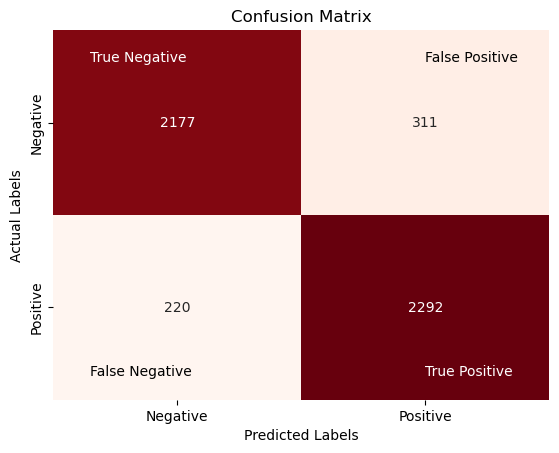

In [26]:
sns.heatmap(conf_matrix_df, fmt='d', annot=True, cbar=None, cmap='Reds')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.text(.15,.15, 'True Negative', va='center', color='white')
plt.text(1.5,1.85, 'True Positive', va='center', color='white')
plt.text(.15, 1.85, 'False Negative', va='center', color='black')
plt.text(1.5,.15, 'False Positive', va='center', color='black')
plt.show()

## Step 8: Get the precision, recall, and F1-score for the test set predictions

In [27]:
# Get the Precision, Recall, and F1-Score for the Test Set Predictions
class_report = classification_report(y_test, lr_predictions)
print(class_report)

              precision    recall  f1-score   support

           0       0.91      0.88      0.89      2488
           1       0.88      0.91      0.90      2512

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



## Step 9: Create a ROC curve for the test set.

In [28]:
# Get the predicted probabilities 
target_probabilities = log_reg_model.predict_proba(X_test_tfidf)[:,1]

# Get the ROC Curve
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, target_probabilities)

# Get the area under the curve
roc_auc = roc_auc_score(y_test, target_probabilities)

In [43]:
print(f'AUC: {roc_auc}')

AUC: 0.9575172611976979


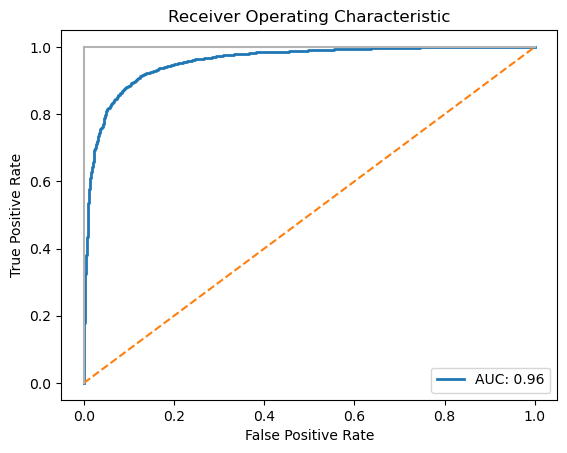

In [29]:
plt.title("Receiver Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate, lw=2, label=f'AUC: {roc_auc:.2f}')
# Create a random guessing model performance line
plt.plot([0,1], ls="--")
# Create a perfect model performance line
plt.plot([0,0], [1,0] , c=".7"), plt.plot([1,1], c=".7")
# Create labels for the graph
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
# Show the AUC ROC score
plt.legend()

## ROC Curve Analysis

The gray line indicates a model that perfectly predicts every observation. The orange dotted line indicates the performance of random guessing. The closer to the solid gray line, the better our model's performance. The Area Under Curve score is another indicator of a model's performance. The closer this value is to one, the better the model's perforamnce. As we can see our model performs exceptionally well. Receiving an Area Under Curve ROC score of .96, this model has good discrimination. 

## Choose Another Model

Choose another model and repeat steps 5-9.

For my second model, I will be using a linear Support Vector Classifier

## Step 5b: Train a Linear SVC using the Training Data

In [30]:
%time
# Create a support vector classifier object
svc = LinearSVC(random_state=10)

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 2.15 µs


In [31]:
%time
# Train the linear SVC model
linear_svc_model = svc.fit(X_train_tfidf, y_train)

CPU times: user 1e+03 ns, sys: 1e+03 ns, total: 2 µs
Wall time: 1.91 µs


/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


## Step 6b: Find the model accuracy on test set.

In [32]:
%time
# Make predictions on the test set to find the accuracy
svc_predictions = linear_svc_model.predict(X_test_tfidf)

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 2.86 µs


In [33]:
# Calculate accuracy score on test set
svc_acc_score = accuracy_score(y_test, svc_predictions)
print(f"Accuracy score: {svc_acc_score:.2%}")

Accuracy score: 89.24%


## Step 7: Create a confusion matrix


In [34]:
labels = "Negative", "Positive"
svc_conf_matrix = confusion_matrix(y_test, svc_predictions)
svc_conf_matrix_df = pd.DataFrame(svc_conf_matrix, index=labels, columns=labels)

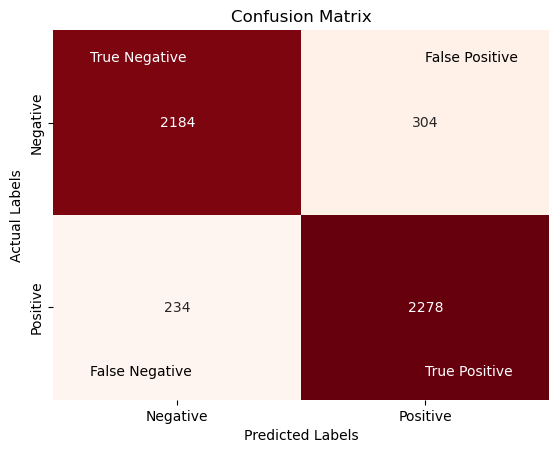

In [35]:
sns.heatmap(svc_conf_matrix_df, fmt='d', annot=True, cbar=None, cmap='Reds')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.text(.15,.15, 'True Negative', va='center', color='white')
plt.text(1.5,1.85, 'True Positive', va='center', color='white')
plt.text(.15, 1.85, 'False Negative', va='center', color='black')
plt.text(1.5,.15, 'False Positive', va='center', color='black')
plt.show()

## Step 8b: Get the precision, recall, and F1-score for the test set predictions

In [36]:
# Get the Precision, Recall, and F1-Score for the Test Set Predictions
svc_class_report = classification_report(y_test, svc_predictions)
print(svc_class_report)

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      2488
           1       0.88      0.91      0.89      2512

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



## Step 9b: Create a ROC curve for the test set.

In [41]:
decision_scores = linear_svc_model.decision_function(X_test_tfidf)
fpr, tpr, thres = roc_curve(y_test, decision_scores)
svc_roc_auc = roc_auc_score(y_test, decision_scores)

In [42]:
print(f'AUC: {svc_roc_auc}')

AUC: 0.9570527704958323


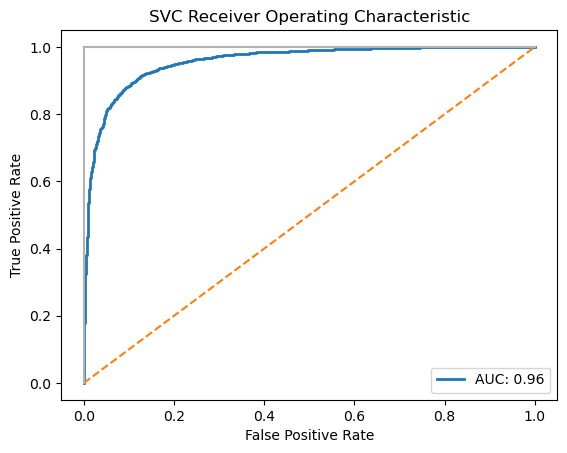

In [40]:
plt.title("SVC Receiver Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate, lw=2, label=f'AUC: {svc_roc_auc:.2f}')
# Create a random guessing model performance line
plt.plot([0,1], ls="--")
# Create a perfect model performance line
plt.plot([0,0], [1,0] , c=".7"), plt.plot([1,1], c=".7")
# Create labels for the graph
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
# Show the AUC ROC score
plt.legend()

## ROC Curve Analysis

The Linear Support Vector Classifer is also good at discriminating the class membership of predicted values, with an AUC of .96. Similar to the previous graph, the gray line indicates a perfect prediction for every observation, and the dotted orange line indicates random guessing. 

## Conclusion

Both the Logistic Regression model and Linear Support Vector Classifier performed well. Their resulting accuracy scores were very similar. The Logistic Regression model achieved an accuracy score of 89.38%, whereas the Linear SVC achieved an accuracy score of 89.24% Both the Logistic Regression and Linear SVC models achieved a score of 89% for recall, precision, and F1 Score. 

Additionally, the AUC of both models rounds to .96, indicating that both models have good performance in regards to predicting the appropriate class for an observation. 

I initially was confused when trying to use the Linear SVC with predict_proba function. While the use of this function is possible when using a SVC(kernel='linear', probability=True) model. From what I found, it is not recommended to do this. For one, the SVC model is much slower than a LinearSVC model.
<br>Additionally, from 
[this article](https://stackoverflow.com/questions/59227176/how-to-plot-roc-and-calculate-auc-for-binary-classifier-with-no-probabilities-s?noredirect=1#comment104668366_59227176) 
it indicates that there are possible theoretical issues with Platts scaling, so it is better to use decision_function rather than predict_proba. 
